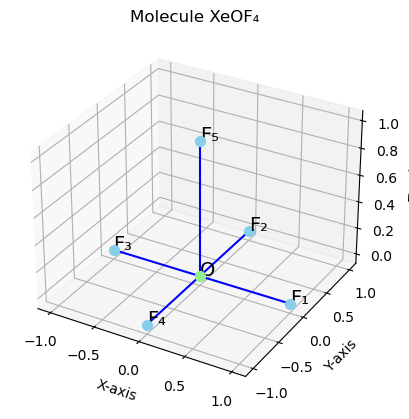

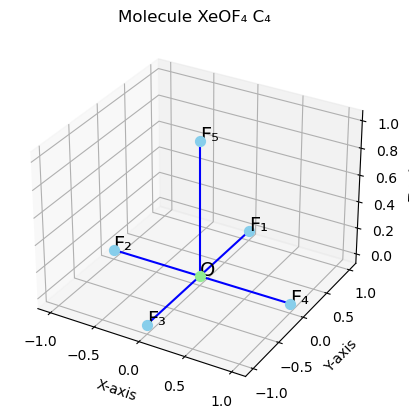

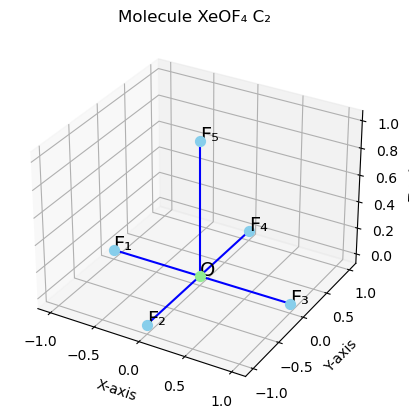

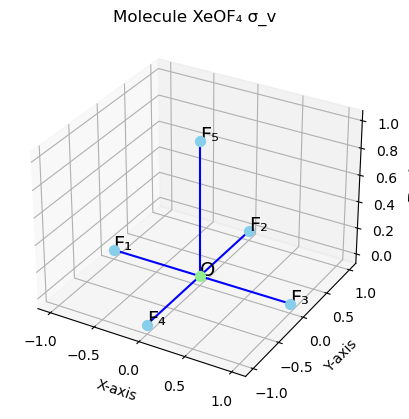

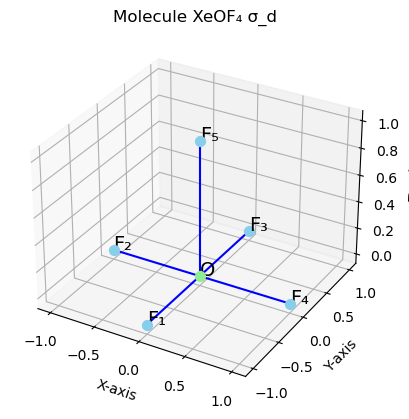

Γ_xyz   =  [ 3  1 -1  1  1]
Γ_atom  =  [6 2 2 4 2]
Γ_total =  [18  2 -2  4  2] 

Γ_rot =  [ 3  1 -1 -1 -1] 

Γ_vib = Γ_total - Γ_xyz - Γ_rot 
Γ_vib =  [12  0  0  4  2] 

Γ_xyz = 1A₁ + 1E 
Γ_rot = 1A₂ + 1E 
Γ_vib = 3A₁ + 2B₁ + 1B₂ + 3E 


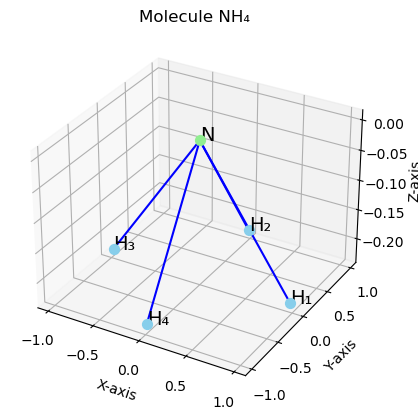

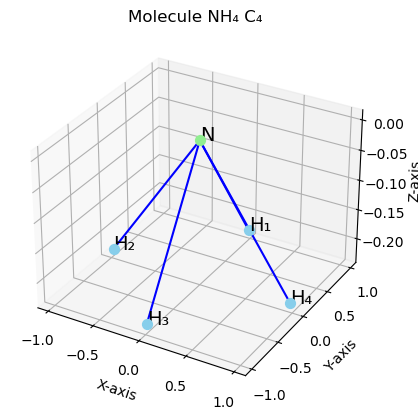

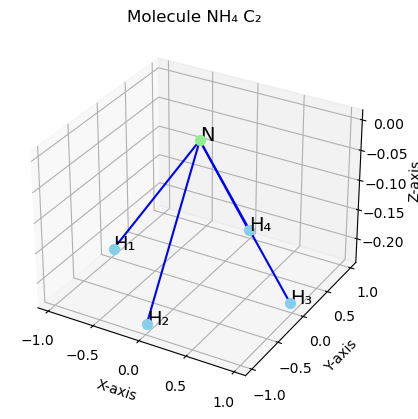

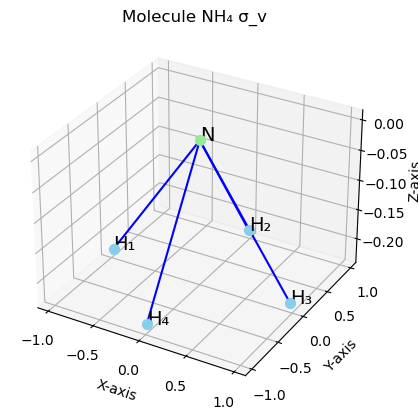

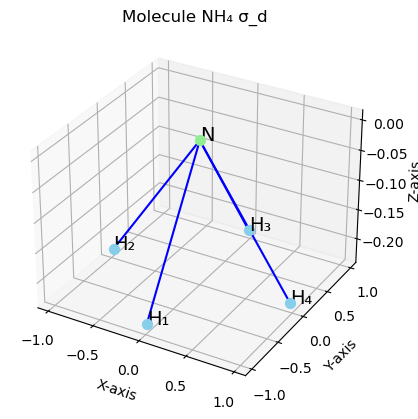

Γ_xyz   =  [ 3  1 -1  1  1]
Γ_atom  =  [5 1 1 3 1]
Γ_total =  [15  1 -1  3  1] 

Γ_rot =  [ 3  1 -1 -1 -1] 

Γ_vib = Γ_total - Γ_xyz - Γ_rot 
Γ_vib =  [ 9 -1  1  3  1] 

Γ_xyz = 1A₁ + 1E 
Γ_rot = 1A₂ + 1E 
Γ_vib = 2A₁ + 2B₁ + 1B₂ + 2E 


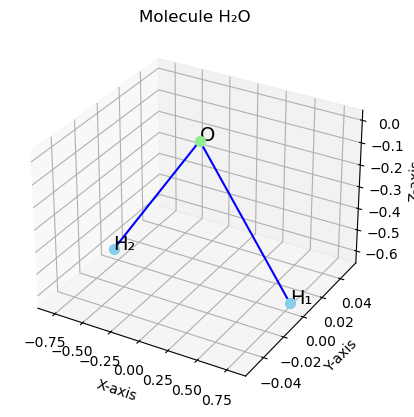

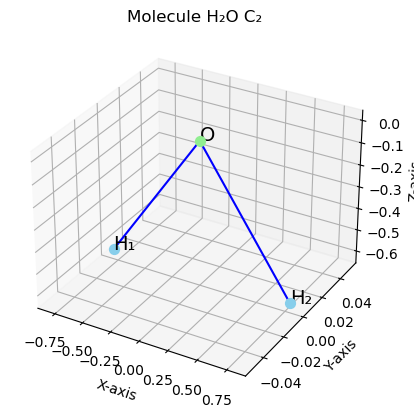

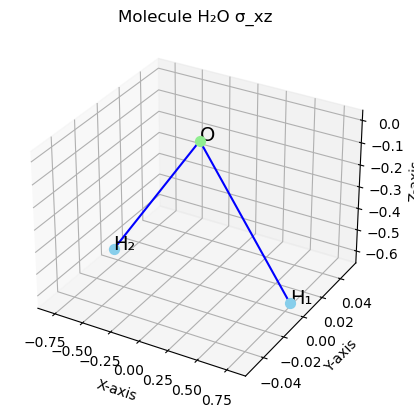

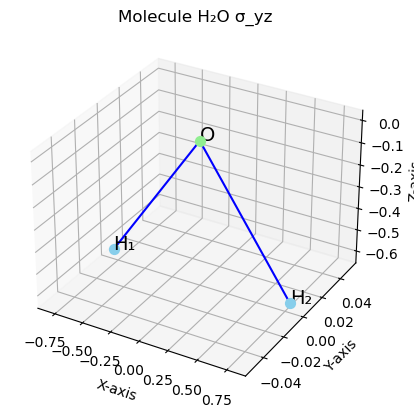

Γ_xyz   =  [ 3 -1  1  1]
Γ_atom  =  [3 1 3 1]
Γ_total =  [ 9 -1  3  1] 

Γ_rot =  [ 3 -1 -1 -1] 

Γ_vib = Γ_total - Γ_xyz - Γ_rot 
Γ_vib =  [3 1 3 1] 

Γ_xyz = 1A₁ + 1B₁ + 1B₂ 
Γ_rot = 1A₂ + 1B₁ + 1B₂ 
Γ_vib = 2A₁ + 1B₁ 


In [4]:
from sympy import symbols, Matrix
from sympy.abc import x, y, z
import numpy as np
import matplotlib.pyplot as plt

# Define symbols for representations
NC, A1, A2, B1, B2, E = symbols('NC A₁ A₂ B₁ B₂ E')
RI = ['A₁', 'A₂', 'B₁', 'B₂', 'E']
N, Rx, Ry, Rz = symbols('N R1 R2 R3')

import pandas as pd

"""
Define the character table (the first row indicates the number of characters)
The last element of the row indicates x, y, z, Rx, Ry, or Rz
0=null, 1= x, y, or z, 2 = Rx, Ry, or Rz, 3 = xi or Ri
"""
# Define data for each table
table_c2v = {
    'NC': [1, 1, 1, 1, 0],
    'A₁': [1, 1, 1, 1, 1],
    'A₂': [1, 1, -1, -1, 2],
    'B₁': [1, -1, 1, -1, 3],
    'B₂': [1, -1, -1, 1, 3]
}

table_c3v = {
    'NC': [1, 2, 3, 0],
    'A₁': [1, 1, 1, 1],
    'A₂': [1, 1, -1, 2],
    'E': [2, -1, 0, 3]
}

table_c4v = {
    'NC': [1, 2, 1, 2, 2, 0],
    'A₁': [1, 1, 1, 1, 1, 1],
    'A₂': [1, 1, 1, -1, -1, 2],
    'B₁': [1, -1, 1, 1, -1, 0],
    'B₂': [1, -1, 1, -1, 1, 0],
    'E': [2, 0, -2, 0, 0, 3]
}

# Function for subscripts and superscripts
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

# Convert the character table into a matrix
c2v = np.array(list(table_c2v.values()))
c3v = np.array(list(table_c3v.values()))
c4v = np.array(list(table_c4v.values()))

# Coordinates of atoms in spherical coordinates
coor_H2O = np.array([[1, 0, 127.75], [1, 180, 127.75]])
coor_NH3 = np.array([[1,0,103 ],[1,120,103],[1,240,103]])
coor_NH4 = np.array([[1,0,103], [1,90,103], [1,180,103], [1,270,103]])
coor_XeOF4 = np.array([[1,0,90], [1,90,90], [1,180,90], [1,270,90], [1,0,0]])

def size(char_table):
    # Count the number of rows in the selected character table
    n = int(np.size(char_table[0]))
    m = n
    return n, m
    
# Get translational gamma (detect which rows should be added)
def g_xyz(char_table):
    n, m = size(char_table)
    gamma_xyz = np.zeros(n-1,int)
    
    for i in range(1, n):
        if char_table[i, -1] == 1 or char_table[i, -1] == 3:
            gamma_xyz =  gamma_xyz + char_table[i, 0:-1]
    return gamma_xyz

# Get rotational gamma (detect which rows should be added)
def g_rot(char_table):
    n, m = size(char_table)
    gamma_rot = np.zeros(n-1,int)
    for i in range(1, n):
        if char_table[i, -1] == 2 or char_table[i, -1] == 3:
            gamma_rot =  gamma_rot + char_table[i, 0:-1]
    return gamma_rot

def esfer_to_xyz(vec_pos):
    n_atoms = int(np.size(vec_pos)/3)
    vec_xyz = np.zeros((n_atoms,3))
    for i, vector in enumerate(vec_pos):
        vec_xyz[i,0] = round(vector[0]*np.sin(np.radians(vector[2]))*np.cos(np.radians(vector[1])),4)
        vec_xyz[i,1] = round(vector[0]*np.sin(np.radians(vector[2]))*np.sin(np.radians(vector[1])),4)
        vec_xyz[i,2] = round(vector[0]*np.cos(np.radians(vector[2])),4)
    return vec_xyz


def plot_molecule(coor_esf, title='Molecule', ac_label='C', ar_label='H'):
    atom_central = np.array([0, 0, 0])  
    # Convert coordinates to Cartesian for plotting
    coordinates = esfer_to_xyz(coor_esf)
    # Configure 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Draw atoms
    ax.scatter(*atom_central, s=50, c='lightgreen', marker='o')
    for i, h in enumerate(coordinates):
        ax.scatter(*h, s=50, c='skyblue', marker='o')

    # Draw bonds
    for h in coordinates:
        ax.plot([atom_central[0], h[0]], [atom_central[1], h[1]], [atom_central[2], h[2]], c='b')

    # Atom labels
    ax.text(*atom_central, ac_label, fontsize=14, color='k', ha='left')
    for i, h in enumerate(coordinates):
        ax.text(*h, ar_label+f'{i + 1}'.translate(SUB), fontsize=14, color='k', ha='left')

    # Configure plot appearance
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title(title)
    plt.show()
    
def cn(n, coor_esfe):
    n_atoms = int(np.size(coor_esfe)/3)
    coor_new = np.zeros((n_atoms,3))
    for i, atom in enumerate(coor_esfe):
        coor_new[i,0] = atom[0]
        coor_new[i,1] = atom[1] + 360/n
        coor_new[i,2] = atom[2]
    return coor_new

def sigma(plane, coor_esfer):
    n_atoms = int(np.size(coor_esfer)/3)
    coor_new = np.zeros((n_atoms,3))
    if plane == 'v' or plane == 'yz':
        for i, atom in enumerate(coor_esfer):
            coor_new[i,0] = atom[0]
            if atom[1] <= 180:
                coor_new[i,1] = 180 - atom[1]
            elif atom[1] > 180:
                coor_new[i,1] = 540 - atom[1]
            coor_new[i,2] = atom[2]
    elif plane == 'xz':
        for i, atom in enumerate(coor_esfer):
            coor_new[i,0] = atom[0]
            coor_new[i,1] = 360 - atom[1]
            coor_new[i,2] = atom[2]
    elif plane == 'd':
        coor_new[0] = coor_esfer[3]
        coor_new[1] = coor_esfer[2]
        coor_new[2] = coor_esfer[1]
        coor_new[3] = coor_esfer[0]
    if n_atoms > 4:
        coor_new[4] = coor_esfer[4]
    return coor_new

def aRI(gamma, g_name, char_table):
    n, m = size(char_table)
    order = np.sum(char_table[0])  # order of the symmetry group
    aRI = np.zeros(n-1, int)
    counter = 1
    for i in range(1, n):
        total_sum = 0
        for j in range(m-1):
            total_sum += char_table[i, j] * char_table[0, j] * gamma[j]
        aRI[i-1] = total_sum / order
        # create the string
        if aRI[i-1] != 0 and counter == 1:
            string = str(aRI[i-1]) + RI[i-1] + " "
            counter += 1
        elif aRI[i-1] != 0:
            string = string + "+ " + str(aRI[i-1]) + RI[i-1] + " "
    print('\u0393_'+g_name+' = '+string)
    return aRI

def symmetry_operations_c4v(molec_c4v, n, molec_name, ac, ar):
    # Perform all symmetry operations on the molecule and plot
    xyz_c4v = esfer_to_xyz(molec_c4v)
    plot_molecule(molec_c4v, title='Molecule '+molec_name, ac_label=ac, ar_label=ar)
    molec_c4v_c4 = cn(4, molec_c4v)
    plot_molecule(molec_c4v_c4, title='Molecule '+molec_name+' C₄', ac_label=ac, ar_label=ar)
    molec_c4v_c2 = cn(2, molec_c4v)
    plot_molecule(molec_c4v_c2, title='Molecule '+molec_name+' C₂', ac_label=ac, ar_label=ar)
    molec_c4v_sv = sigma('v', molec_c4v)
    plot_molecule(molec_c4v_sv, title='Molecule '+molec_name+' σ_v', ac_label=ac, ar_label=ar)
    molec_c4v_sd = sigma('d', molec_c4v)
    plot_molecule(molec_c4v_sd, title='Molecule '+molec_name+' σ_d', ac_label=ac, ar_label=ar)
    
    xyz_c4v_c4 = esfer_to_xyz(cn(4, molec_c4v))
    xyz_c4v_c2 = esfer_to_xyz(cn(2, molec_c4v))
    xyz_c4v_sv = esfer_to_xyz(sigma('v', molec_c4v))
    xyz_c4v_sd = esfer_to_xyz(sigma('d', molec_c4v))
    
    gamma_atoms = np.ones(5, int)
    gamma_atoms[0] = n
    for i in range(n-1):
        if all(xyz_c4v_c4[i] == xyz_c4v[i]):
            gamma_atoms[1] = gamma_atoms[1] + 1
    for i in range(n-1):
        if all(xyz_c4v_c2[i] == xyz_c4v[i]):
            gamma_atoms[2] = gamma_atoms[2] + 1
    for i in range(n-1):
        if all(xyz_c4v_sv[i] == xyz_c4v[i]):
            gamma_atoms[3] = gamma_atoms[3] + 1
    for i in range(n-1):
        if all(xyz_c4v_sd[i] == xyz_c4v[i]):
            gamma_atoms[4] = gamma_atoms[4] + 1
    return gamma_atoms

def symmetry_operations_c2v(molec_c2v, n, molec_name, ac, ar):
    # Perform all symmetry operations on the molecule and plot
    xyz_c2v = esfer_to_xyz(molec_c2v)
    plot_molecule(molec_c2v, title='Molecule '+molec_name, ac_label=ac, ar_label=ar)
    molec_c2v_c2 = cn(2, molec_c2v)
    plot_molecule(molec_c2v_c2, title='Molecule '+molec_name+' C₂', ac_label=ac, ar_label=ar)
    molec_c2v_xz = sigma('xz', molec_c2v)
    plot_molecule(molec_c2v_xz, title='Molecule '+molec_name+' σ_xz', ac_label=ac, ar_label=ar)
    molec_c2v_yz = sigma('yz', molec_c2v)
    plot_molecule(molec_c2v_yz, title='Molecule '+molec_name+' σ_yz', ac_label=ac, ar_label=ar)
    
    xyz_c2v_c2 = esfer_to_xyz(molec_c2v_c2)
    xyz_c2v_sxz = esfer_to_xyz(sigma('xz', molec_c2v))
    xyz_c2v_syz = esfer_to_xyz(sigma('yz', molec_c2v))
    
    gamma_atoms = np.ones(4, int)
    gamma_atoms[0] = n
    for i in range(n-1):
        if all(xyz_c2v_c2[i] == xyz_c2v[i]):
            gamma_atoms[1] = gamma_atoms[1] + 1
    for i in range(n-1):
        if all(xyz_c2v_sxz[i] == xyz_c2v[i]):
            gamma_atoms[2] = gamma_atoms[2] + 1
    for i in range(n-1):
        if all(xyz_c2v_syz[i] == xyz_c2v[i]):
            gamma_atoms[3] = gamma_atoms[3] + 1
    return gamma_atoms

# Function that obtains all the gammas, irreducible representations, 
# and plots the symmetry operations of the C4v symmetry group
def c4v_main(molecule, n_atoms, molec_label, ac, ar):
    gamma_atom = symmetry_operations_c4v(molecule, n_atoms, molec_label, ac=ac, ar=ar)
    g_xyz_c4v = g_xyz(c4v)
    print('\u0393_xyz   = ', g_xyz_c4v)
    print('\u0393_atom  = ', gamma_atom)
    # Obtain total gamma
    g_total_c4v = g_xyz_c4v * gamma_atom
    print('\u0393_total = ', g_total_c4v, '\n')
    # Obtain rotational gamma
    g_rot_c4v = g_rot(c4v)
    print('\u0393_rot = ', g_rot_c4v, '\n')
    # Obtain vibrational gamma
    print('\u0393_vib = \u0393_total - \u0393_xyz - \u0393_rot ')
    g_vib_c4v = g_total_c4v - g_xyz_c4v - g_rot_c4v
    print('\u0393_vib = ', g_vib_c4v, '\n')

    aRI_xyz = aRI(g_xyz_c4v, 'xyz', c4v)
    aRI_rot = aRI(g_rot_c4v, 'rot', c4v)
    aRI_vib = aRI(g_vib_c4v, 'vib', c4v)

# Function that obtains all the gammas, irreducible representations, 
# and plots the symmetry operations of the C2v symmetry group
def c2v_main(molecule, n_atoms, molec_label, ac, ar):
    gamma_atom = symmetry_operations_c2v(molecule, n_atoms, molec_label, ac=ac, ar=ar)
    g_xyz_c2v = g_xyz(c2v)
    print('\u0393_xyz   = ', g_xyz_c2v)
    print('\u0393_atom  = ', gamma_atom)
    # Obtain total gamma
    g_total_c2v = g_xyz_c2v * gamma_atom
    print('\u0393_total = ', g_total_c2v, '\n')
    # Obtain rotational gamma
    g_rot_c2v = g_rot(c2v)
    print('\u0393_rot = ', g_rot_c2v, '\n')
    # Obtain vibrational gamma
    print('\u0393_vib = \u0393_total - \u0393_xyz - \u0393_rot ')
    g_vib_c2v = g_total_c2v - g_xyz_c2v - g_rot_c2v
    print('\u0393_vib = ', g_vib_c2v, '\n')

    aRI_xyz = aRI(g_xyz_c2v, 'xyz', c2v)
    aRI_rot = aRI(g_rot_c2v, 'rot', c2v)
    aRI_vib = aRI(g_vib_c2v, 'vib', c2v)

c4v_main(coor_XeOF4, 6, "XeOF₄", 'O', 'F')
c4v_main(coor_NH4, 5, "NH₄", 'N', 'H')
c2v_main(coor_H2O, 3, 'H₂O', 'O', 'H')

